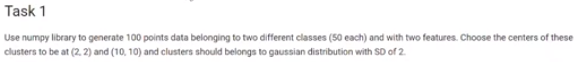

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x1 = np.random.normal(2, 2, 100).reshape(50,2)
x2 = np.random.normal(10, 2, 100).reshape(50,2)
x1.shape, x2.shape

((50, 2), (50, 2))

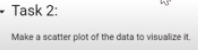

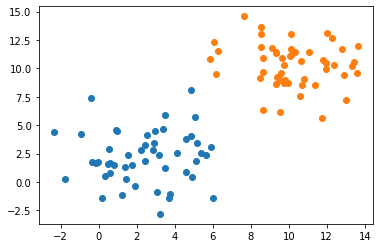

In [3]:
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])

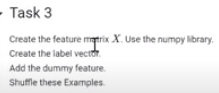

In [4]:
X = np.concatenate((x1, x2))
# print(np.ones(X.shape[0]).reshape(-1,100).shape, X.T.shape)
labels = np.concatenate((np.zeros(50), np.ones(50))).astype(int)

In [5]:
X = np.concatenate((np.ones(X.shape[0]).reshape(-1,100), X.T)).T #add dummy to X
print(X.shape)

(100, 3)


In [6]:
X = np.random.permutation(X) #shuffle it
X

array([[ 1.        ,  9.33169838, 11.46137352],
       [ 1.        , 10.60088892,  7.56502386],
       [ 1.        ,  6.17881066,  9.47127314],
       [ 1.        , 12.78149426, 11.68326258],
       [ 1.        , 10.06474618, 11.08274346],
       [ 1.        ,  0.1562718 , -1.43483089],
       [ 1.        ,  4.58124258,  3.79234358],
       [ 1.        ,  5.17996738,  3.43187236],
       [ 1.        ,  3.37503507,  4.62578417],
       [ 1.        ,  8.55499127, 13.05254009],
       [ 1.        ,  4.92192325,  0.44604933],
       [ 1.        ,  3.22923472, -2.81204366],
       [ 1.        ,  0.36025502,  0.51956268],
       [ 1.        ,  6.07565057, 12.3604727 ],
       [ 1.        ,  2.41680402,  1.83238246],
       [ 1.        , 10.15852658, 11.26972364],
       [ 1.        ,  9.76282245, 10.3383457 ],
       [ 1.        ,  6.01759896, -1.44085563],
       [ 1.        ,  3.16162621,  2.36071615],
       [ 1.        ,  2.55794488,  4.10995378],
       [ 1.        ,  1.45328597,  0.273

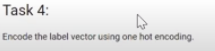

In [7]:
labels = np.random.permutation(labels)

In [8]:
labels = np.eye(2)[labels]
labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

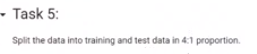

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(80, 3) (80, 2) (20, 3) (20, 2)


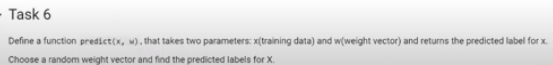

In [10]:
def predict(x, w):
    z = x @ w
    return np.argmax(z, axis=1)

In [11]:
#creating dummy weight vector to test. weight vector has the shape m x 2
w = np.random.rand(x_train.shape[1], y_train.shape[1])
predict(x_train, w)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

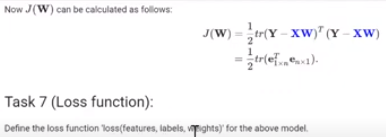

In [12]:
def loss(x, y, w):
    e = y - x @ w
    return 0.5 * np.trace(e.T @ e)

In [13]:
loss(x_train, y_train, w)

1750.772913130712

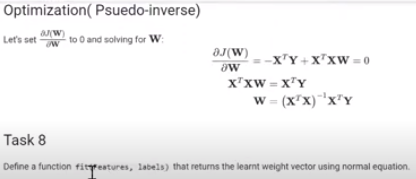

In [14]:
def fit(x, y):
    return np.linalg.pinv(x.T @ x) @ x.T @ y

In [15]:
# Finding the new weight vector
w = fit(x_train, y_train)
loss(x_train, y_train, w)

19.555583633151798

In [16]:
#Predicting using the new weight vector
predicted_output = predict(x_train, w)
print(predicted_output)
# THis must roughly agree with y_train (one-hot decoded)
original_output = np.argmax(y_train, axis=1)
print(original_output)

[0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 1 0 1 1 0 0]
[0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1
 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0
 1 1 0 1 0 0]


In [17]:
#counts must be roughly equal
print(predicted_output[predicted_output==1].sum())
print(original_output[original_output==1].sum())

35
39


In [18]:
#Predicting using the new weight vector
predicted_output = predict(x_test, w)
print(predicted_output)
# THis must roughly agree with y_train (one-hot decoded)
original_output = np.argmax(y_test, axis=1)
print(original_output)

[1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0]
[0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0]


In [19]:
#counts must be roughly equal
print(predicted_output[predicted_output==1].sum())
print(original_output[original_output==1].sum())

8
11
